In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure


In [7]:
data = pd.read_csv('chicago.csv')

In [8]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [47]:
primary_type = data['Primary Type'].value_counts()
print(primary_type)

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [10]:
data.shape

(1456714, 23)

In [16]:
data["Primary Type"].value_counts().describe()


count        33.000000
mean      44142.848485
std       77885.846405
min           4.000000
25%         662.000000
50%        6195.000000
75%       61138.000000
max      329460.000000
Name: Primary Type, dtype: float64

<Axes: xlabel='count', ylabel='Primary Type'>

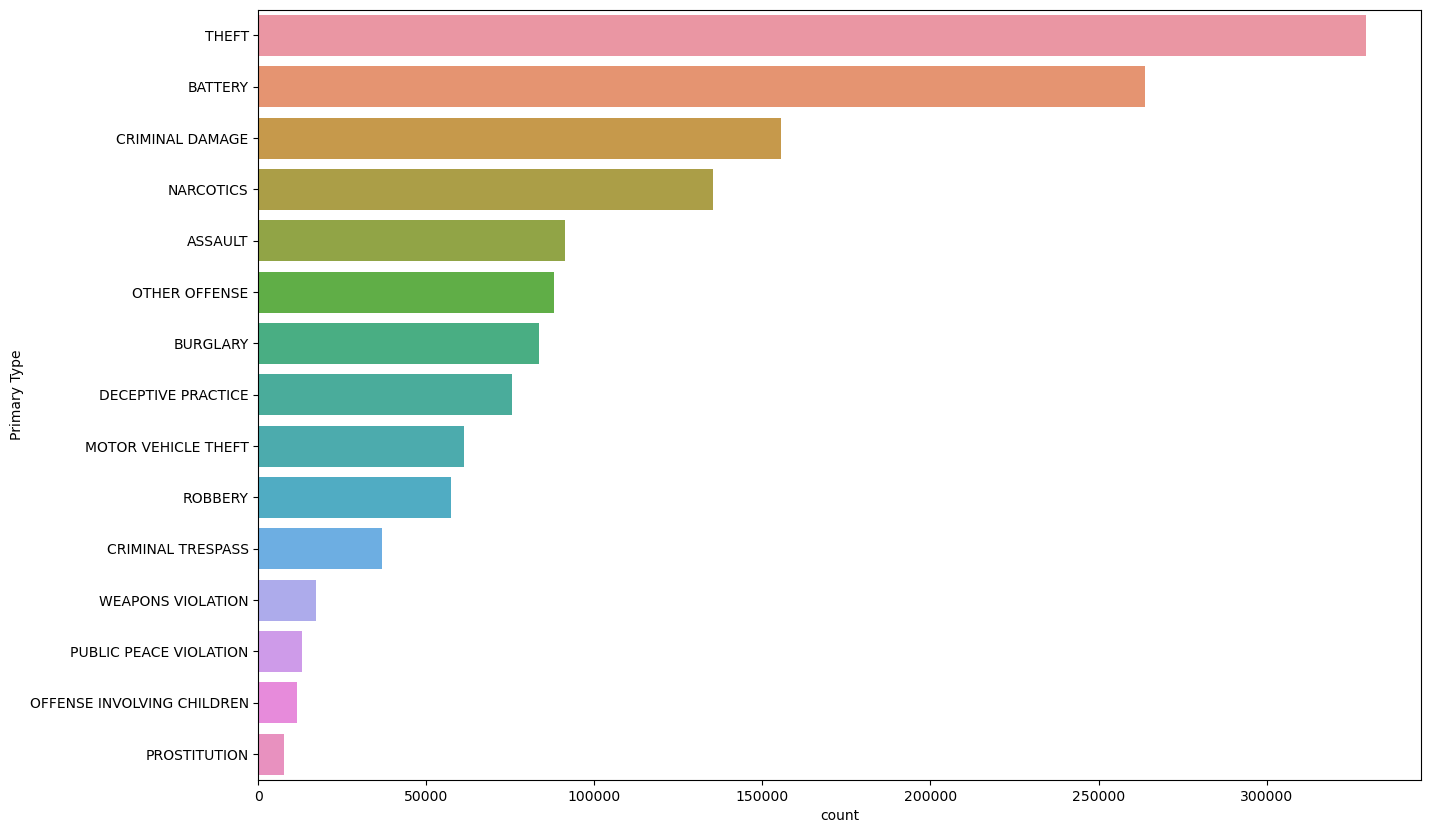

In [45]:
order_df = data['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = data, order = order_df)



In [24]:
data.value_counts("Location Description")

Location Description
STREET                   330471
RESIDENCE                233530
APARTMENT                185023
SIDEWALK                 160891
OTHER                     55774
                          ...  
GARAGE/AUTO REPAIR            1
CLUB                          1
CTA "L" PLATFORM              1
CTA "L" TRAIN                 1
EXPRESSWAY EMBANKMENT         1
Length: 142, dtype: int64

In [12]:
duplicates = data[data.duplicated()]
print("Duplicated Values in the data set ", duplicates.shape[0])

Duplicated Values in the data set  0


In [14]:
for col in data.dtypes.index:
    if data[col].dtype=='object':
        print('\n Total unique value in the colums {} is \n'.format(col),data[col])


 Total unique value in the colums Case Number is 
 0          HZ250496
1          HZ250409
2          HZ250503
3          HZ250424
4          HZ250455
             ...   
1456709    HZ250507
1456710    HZ250491
1456711    HZ250479
1456712    HZ250370
1456713    HZ250517
Name: Case Number, Length: 1456714, dtype: object

 Total unique value in the colums Date is 
 0          05/03/2016 11:40:00 PM
1          05/03/2016 09:40:00 PM
2          05/03/2016 11:31:00 PM
3          05/03/2016 10:10:00 PM
4          05/03/2016 10:00:00 PM
                    ...          
1456709    05/03/2016 11:33:00 PM
1456710    05/03/2016 11:30:00 PM
1456711    05/03/2016 12:15:00 AM
1456712    05/03/2016 09:07:00 PM
1456713    05/03/2016 11:38:00 PM
Name: Date, Length: 1456714, dtype: object

 Total unique value in the colums Block is 
 0            013XX S SAWYER AVE
1            061XX S DREXEL AVE
2           053XX W CHICAGO AVE
3             049XX W FULTON ST
4             003XX N LOTUS AVE
          

C:\Users\Haris\AppData\Local\Temp\ipykernel_1196\1177337934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


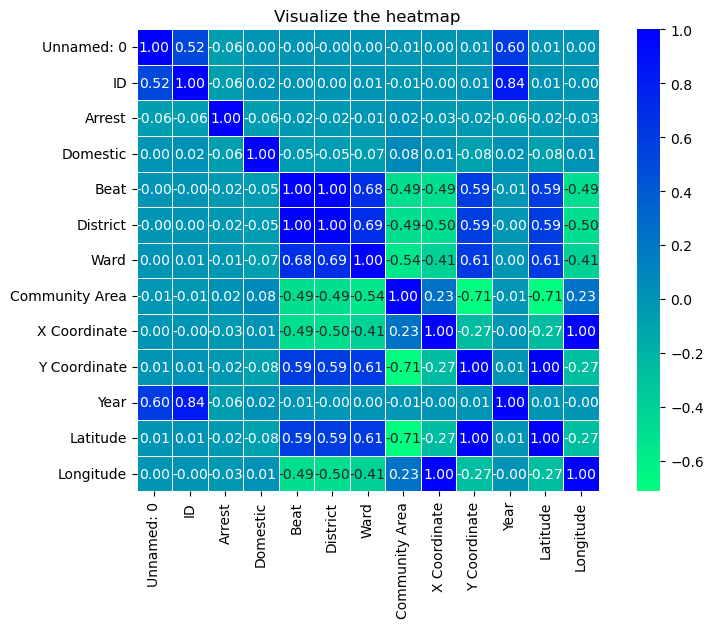

In [15]:
corr = data.corr()
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt='.2f',
           square=True,
           linewidths=.5,ax=ax)
plt.title("Visualize the heatmap")
plt.show()

In [24]:
# Get the value counts of each unique location description
location_counts = data['Location Description'].value_counts()
print(location_counts)


STREET                330471
RESIDENCE             233530
APARTMENT             185023
SIDEWALK              160891
OTHER                  55774
                       ...  
CLUB                       1
CTA "L" PLATFORM           1
GARAGE/AUTO REPAIR         1
CHURCH PROPERTY            1
LAGOON                     1
Name: Location Description, Length: 142, dtype: int64


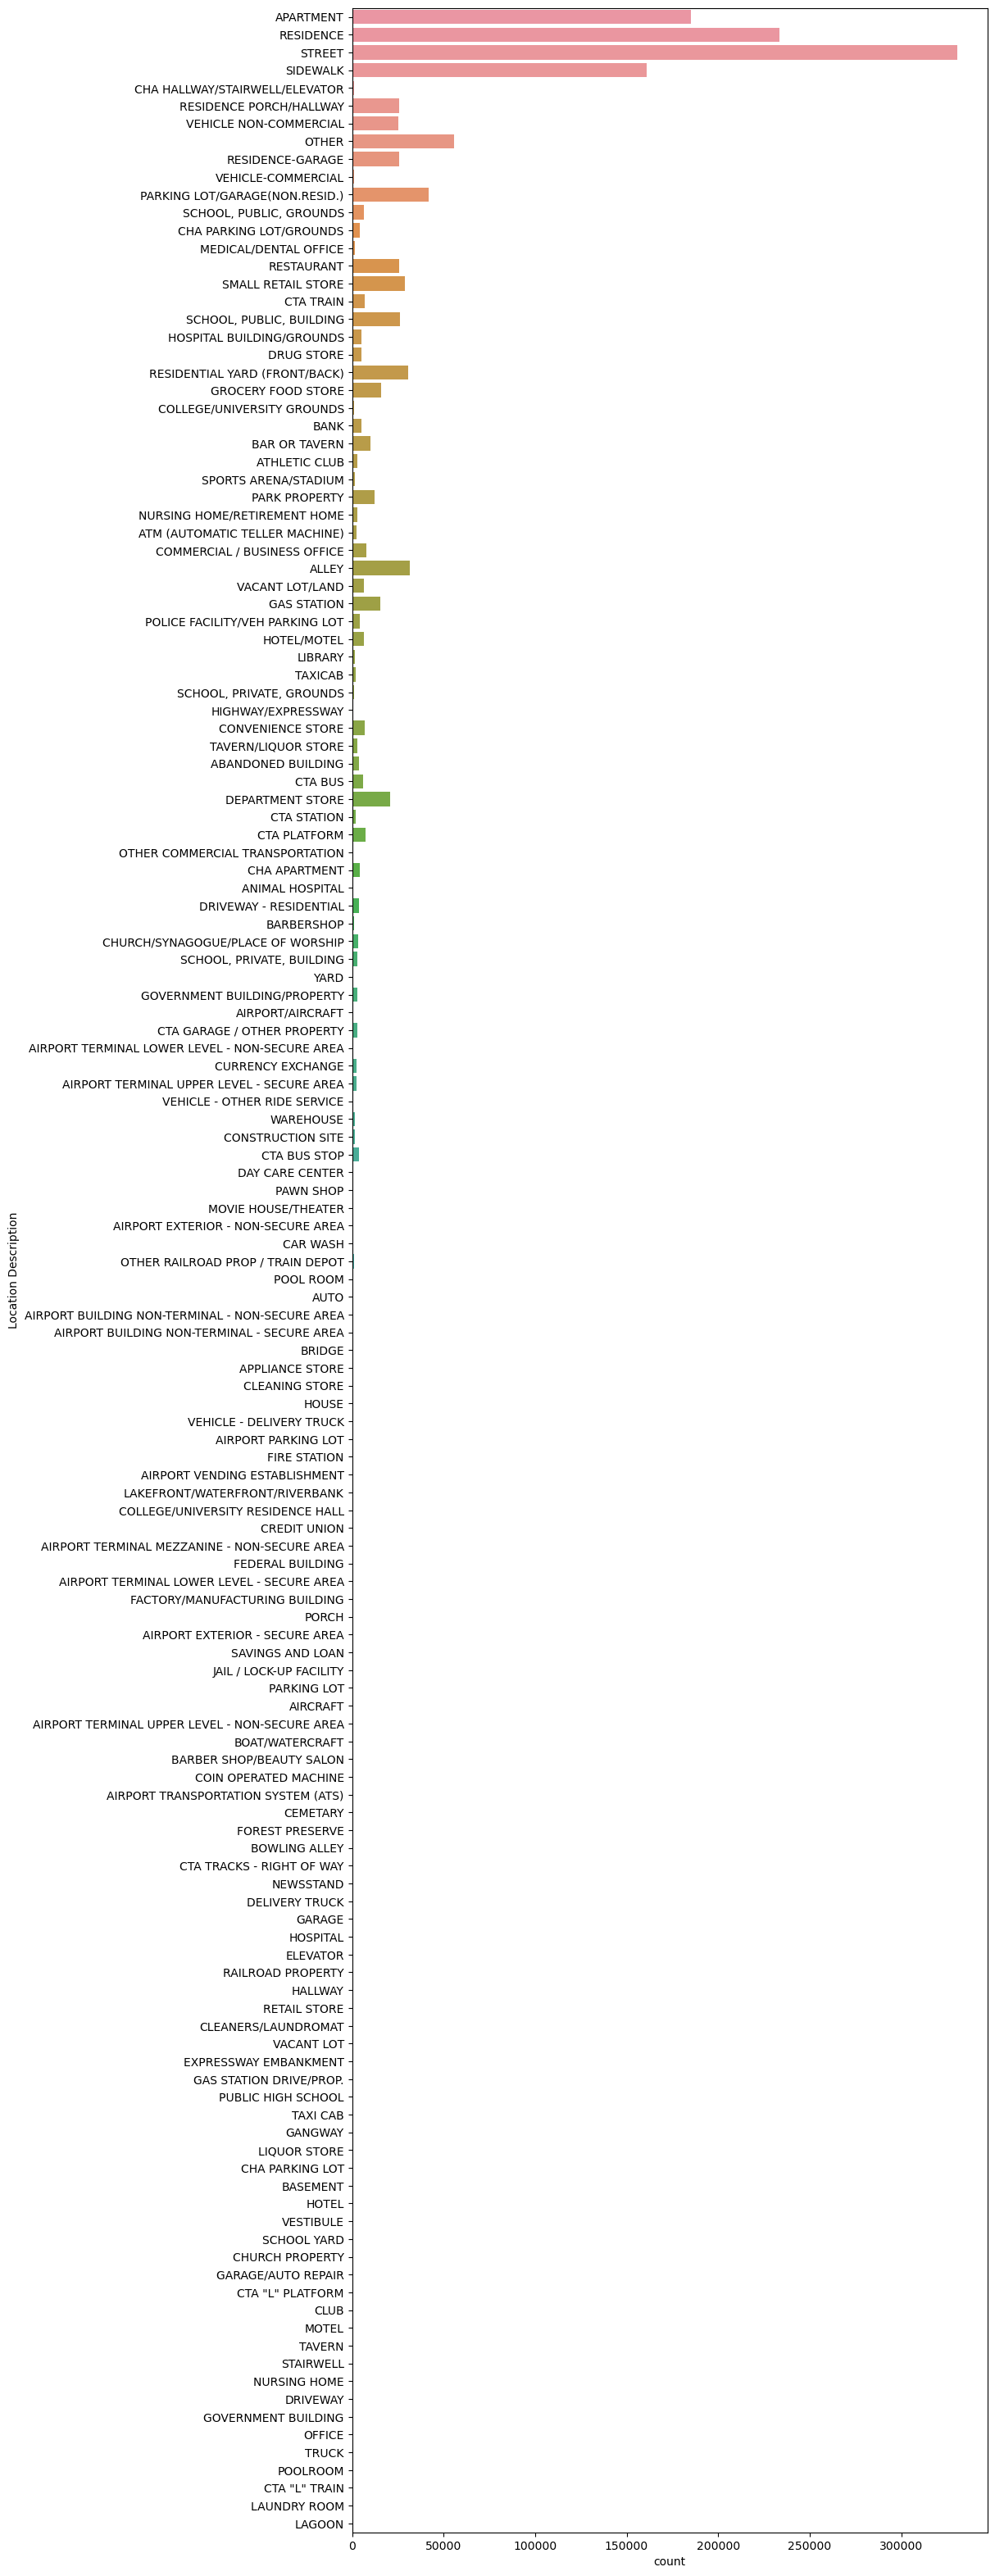

In [29]:
plt.figure(figsize=(10, 40))  # Adjust the size as per your needs
sns.countplot(data=data, y="Location Description")
plt.show()

In [38]:
order_loc = data['Location Description'].value_counts().iloc[:15].index


<Axes: xlabel='count', ylabel='Location Description'>

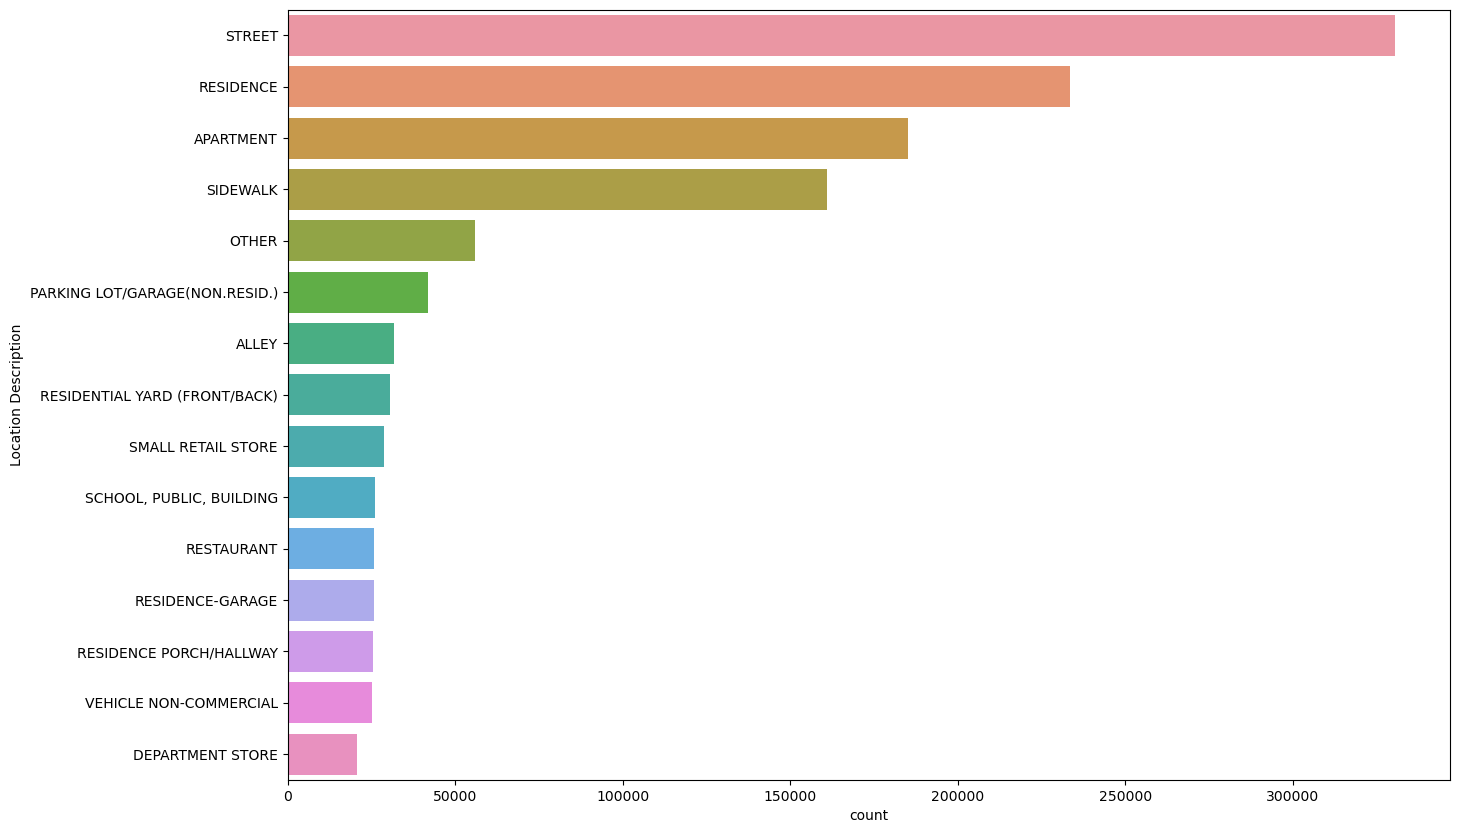

In [41]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = data, order = order_loc)

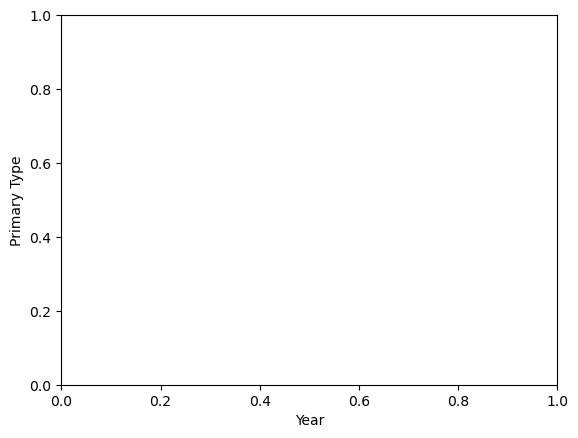

In [50]:
sns.histplot(data=data , x= 'Year', y = primary_type , bins=50 , prtresh=.1 , solor = 'red')
plt.show()